In [14]:
import numpy as np
import matplotlib.pyplot as plt

def epotlist(r,Q,R):
    # r er vektor posisjon i rommet
    # Q er liste med ladninger
    # R er liste med posisjoner for ladninger
    V = 0.0
    for i in range(len(Q)):
        Qi = Q[i] # Q_i
        Ri = R[i] # r_i
        Rnorm = np.linalg.norm(r-Ri)
        V = V + Q[i]/Rnorm
    return V

In [3]:
# ri = (a/2, -d/2 + d/(2N) + i d/N), Qi = Q/N # høyre
# ri = (-a/2, -d/2 + d/(2N) + i d/N), Qi = -Q/N # venstre
Qlist = []
Rlist = []
N = 100
a = 1.0e-2 # m
d = a
Q = 1.0
for i in range(N):
    # Høyre
    xi = a/2
    yi = -d/2+d/(2*N)+i*d/N
    Qi = Q/N
    Qlist.append(Qi)
    Rlist.append(np.array([xi,yi,0]))
for i in range(N):
    # Venstre
    xi = -a/2
    yi = -d/2+d/(2*N)+i*d/N
    Qi = -Q/N
    Qlist.append(Qi)
    Rlist.append(np.array([xi,yi,0]))

In [22]:
# Ide er xi,yi på et gitter finn V(xi,yi)
NL = 50
L = 3e-2 # m
x = np.linspace(-L,L,NL)
y = np.linspace(-L,L,NL)
z = 0.0
rx,ry = np.meshgrid(x,y)

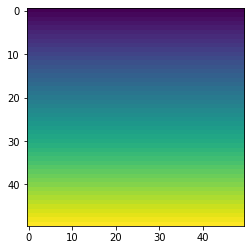

In [6]:
plt.imshow(ry)

In [23]:
V = np.zeros((NL,NL))
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i],ry.flat[i],0])
    V.flat[i] = epotlist(r,Qlist,Rlist)

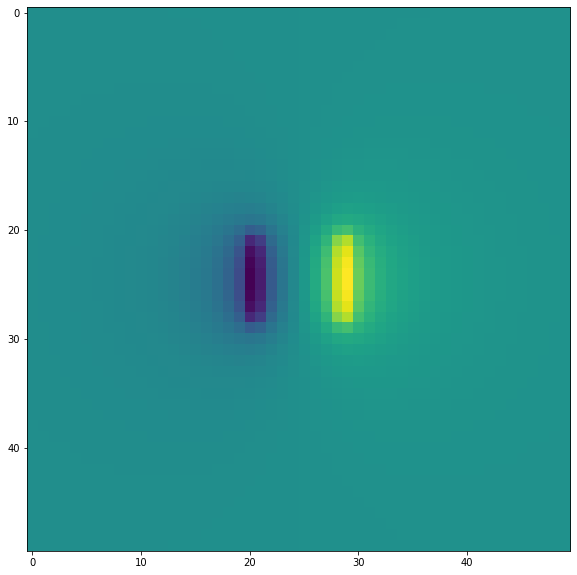

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(V)

In [25]:
Ey,Ex = np.gradient(-V)

(-0.03, 0.03, -0.03, 0.03)

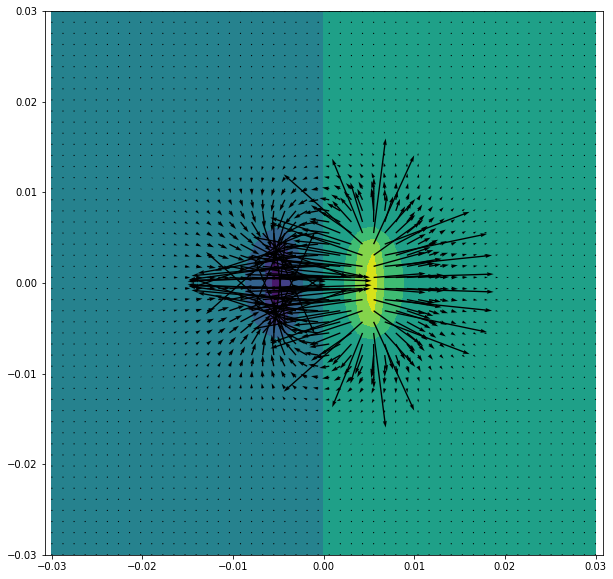

In [26]:
plt.figure(figsize=(10,10))
plt.contourf(rx,ry,V)
plt.quiver(rx,ry,Ex,Ey)
plt.axis('equal')

## Sammenlikning med dipol

Vet at for en dipol er det elektriske potensialet
$$V(\vec{r}) = \frac{\vec{p}\cdot\vec{r}}{4 \pi \epsilon_0 r^3}$$

I dette tilfellet er $\vec{p} = Q \vec{d} = Q (a,0,0)$

Det betyr at langs $x$-aksen er potensialet 
$$ V(x) = \frac{a}{4 \pi \epsilon_0 r^2}$$

In [29]:
x = np.linspace(a/2+0.0001,1000,10000)

In [30]:
Vs = np.zeros(x.shape)

In [31]:
for i in range(len(x)):
    r = np.array([x[i],0,0])
    Vs[i] = epotlist(r,Qlist,Rlist)

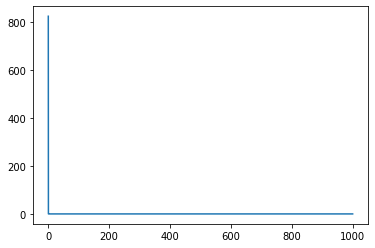

In [33]:
plt.plot(x,Vs)

In [34]:
xlog = np.log10(x)
Vlog = np.log10(Vs)

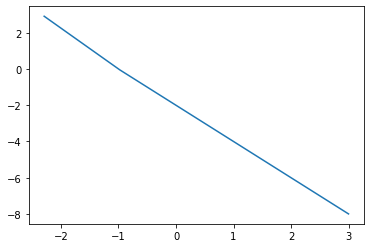

In [35]:
plt.plot(xlog,Vlog)

In [36]:
p = np.polyfit(xlog,Vlog,1)

In [37]:
print(p)

[-2.00085001 -1.99778606]
